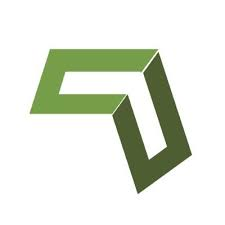

# Anomaly Detection Project
***

## Executive Summary
#### Overview

Presented with a set of questions regarding Code Up's cohorts' online traffic patterns for their use of class lessons and documentation, we are to explore the cohorts' web logs to discover answers to the questions given to us.  Using a SQL database and a .csv containing web logs and cohort data, we will be analyzing the data to find how the cohorts accessed the class lessons online.  

#### Project Goals
- Explore, visualize, and analyze data to discover answers to the questions given to us.
- Create an email in response to the request included below containing findings. 
- Create a single Executive Summary-like slide summarizing most important findings
- Create a Jupyter Notebook outlining work done to answer questions
- Answer at least 5 of the 8 questions asked in the request including:
    - 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    - 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
    - 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
    - 4.  Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
    - 5.  At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
    - 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
    - 7.  Which lessons are least accessed?
    - 8.  Anything else I should be aware of?




#### Outline of Process

The plan for this project is to do the following:
- Acquire cohort schedule info from SQL database and join with cohorts.csv sent to us. 
- Prepare data by dropping columns, renaming columns, handling null values and creating new columns.
- Explore data by visualizing and analyzing data.
- Create questions based off questions sent to us and explore data for answers.
- Come up with conclusions and gather and notate findings.
- Create email and Google Slide with responses to questions and key findings

#### Conclusion & Key Findings




*** 
Project Scenario from Google Assignment

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you

***

Other info:

* To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"
-  To get 100 on this project you only need to answer 5 out of the 7 questions (along with the other deliverables listed below i.e. slide, your notebook, etc).
-  Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings
-  Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.
-  You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.
-  Your slide should be like an executive summary and be in form to present.
-  Continue to use best practices of acquire.py, prepare.py, etc.
-  Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test
-  The cohort schedule is in the SQL database, and alumni.codeup.com has info as well.

# Acquire

We were given a .csv file containing cohorts data.  Will read that into a dataframe to explore.

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import custom libraries
import acquire
import prepare

In [2]:
df_csv = pd.read_csv('cohorts.csv')

In [3]:
df_csv.head()

,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1


In [4]:
df_csv.shape

(46, 5)

In [5]:
df_csv.info

<bound method DataFrame.info of     cohort_id        name  start_date    end_date  program_id
0           1      Arches  2014-02-04  2014-04-22           1
1           2    Badlands  2014-06-04  2014-08-22           1
2           3    Carlsbad  2014-09-04  2014-11-05           1
3           4      Denali  2014-10-20  2015-01-18           1
4           5  Everglades  2014-11-18  2015-02-24           1
5           6    Franklin  2015-02-03  2015-05-26           1
6           7     Glacier  2015-06-05  2015-10-06           1
7           8     Hampton  2015-09-22  2016-02-06           1
8           9      Apollo  2015-03-30  2015-07-29           4
9          10      Balboa  2015-11-03  2016-03-11           4
10         11         Ike  2016-01-20  2016-05-12           1
11         12      Joshua  2016-03-08  2016-06-30           1
12         13       Kings  2016-05-23  2016-09-15           1
13         14      Lassen  2016-07-18  2016-11-10           1
14         15     Mammoth  2016-09-26 

- It looks like we have the Code Up cohorts names, dates started and date ended.

We will acquire data from the curriculum logs DB using SQL queries and our acquire.py

In [6]:
df = acquire.get_cohort_log_data()

In [7]:
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:54,toc,717,NaN,136.50.102.126
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:59,javascript-i/introduction/primitive-types,717,NaN,136.50.102.126
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:37:31,javascript-i/introduction/operators,717,NaN,136.50.102.126
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:25,javascript-i/introduction/variables,717,NaN,136.50.102.126
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:43,javascript-i/introduction/working-with-data-ty...,717,NaN,136.50.102.126


In [8]:
df.shape

(900223, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          847330 non-null  float64
 1   name        847330 non-null  object 
 2   slack       847330 non-null  object 
 3   start_date  847330 non-null  object 
 4   end_date    847330 non-null  object 
 5   created_at  847330 non-null  object 
 6   updated_at  847330 non-null  object 
 7   deleted_at  0 non-null       float64
 8   program_id  847330 non-null  float64
 9   date        900223 non-null  object 
 10  time        900223 non-null  object 
 11  path        900222 non-null  object 
 12  user_id     900223 non-null  int64  
 13  cohort_id   847330 non-null  float64
 14  ip          900223 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 109.9+ MB


In [10]:
df.tail()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
900218,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:13:18,javascript-i/testing-user-functions,969,139.0,107.77.169.64
900219,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:31:48,javascript-i,969,139.0,107.77.169.64
900220,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:31:58,javascript-i/javascript-with-html,969,139.0,107.77.169.64
900221,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,12:32:01,javascript-i/testing-user-functions,969,139.0,107.77.169.64
900222,139.0,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2.0,2021-04-21,13:14:10,/,970,139.0,172.56.14.200


- Our dataframe returns the data from the curriculum logs for all cohorts at Code Up.

## Prepare

Now that we've acquired our data, let's look for nulls.

In [11]:
df.isna().sum()

id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
dtype: int64

In [12]:
acquire.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
id,52893,5.875544
name,52893,5.875544
slack,52893,5.875544
start_date,52893,5.875544
end_date,52893,5.875544
created_at,52893,5.875544
updated_at,52893,5.875544
deleted_at,900223,100.000000
program_id,52893,5.875544
date,0,0.000000


In [13]:
acquire.nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,1,6.666666666666667,847329
1,2,13.333333333333334,1
2,10,66.66666666666666,52893


In [14]:
df[df.name.isna() & df.program_id.isna()]

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:54,toc,717,NaN,136.50.102.126
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:36:59,javascript-i/introduction/primitive-types,717,NaN,136.50.102.126
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:37:31,javascript-i/introduction/operators,717,NaN,136.50.102.126
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:25,javascript-i/introduction/variables,717,NaN,136.50.102.126
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,12:38:43,javascript-i/introduction/working-with-data-ty...,717,NaN,136.50.102.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,10:19:19,java-ii/inheritance-and-polymorphism,48,NaN,216.177.189.26
52889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,10:19:20,java-ii/interfaces-and-abstract-classes,48,NaN,216.177.189.26
52890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-08,15:29:32,/,362,NaN,70.123.200.145
52891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-09,08:01:30,/,367,NaN,216.180.182.238


#### Deciding to drop nulls since they do not have a cohort associated to them and eliminates much of the earlier data during curriculum and cohort establishment making for a cleaner data frame.  Will look into nulls later. Will add code to drop nulls in prepare.py.

In [15]:
df = prepare.prepare_data()
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type
2019-06-01 17:31:13,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:13,/,402,1.0,71.78.236.131,php
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:28,java-i,402,1.0,71.78.236.131,php
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:40,html-css,402,1.0,71.78.236.131,php
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:56:01,html-css/elements,402,1.0,71.78.236.131,php


In [16]:
df.isna().sum()

id              0
name            0
slack           0
start_date      0
end_date        0
created_at      0
updated_at      0
program_id      0
date            0
time            0
path            0
user_id         0
cohort_id       0
ip              0
program_type    0
dtype: int64

- Nulls have been removed

In [17]:
#Look at prepped dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847329 entries, 2019-06-01 17:31:13 to 2021-04-21 13:14:10
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            847329 non-null  float64       
 1   name          847329 non-null  object        
 2   slack         847329 non-null  object        
 3   start_date    847329 non-null  datetime64[ns]
 4   end_date      847329 non-null  datetime64[ns]
 5   created_at    847329 non-null  datetime64[ns]
 6   updated_at    847329 non-null  datetime64[ns]
 7   program_id    847329 non-null  float64       
 8   date          847329 non-null  datetime64[ns]
 9   time          847329 non-null  datetime64[ns]
 10  path          847329 non-null  object        
 11  user_id       847329 non-null  int64         
 12  cohort_id     847329 non-null  float64       
 13  ip            847329 non-null  object        
 14  program_type  847329 non-null  obj

In [18]:
df.columns

Index(['id', 'name', 'slack', 'start_date', 'end_date', 'created_at',
       'updated_at', 'program_id', 'date', 'time', 'path', 'user_id',
       'cohort_id', 'ip', 'program_type'],
      dtype='object')

In [19]:
#Look at the different counts per each program ID
df.program_id.value_counts()

2.0    713365
3.0    103411
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [20]:
df.program_type.value_counts()

java            713365
data_science    103411
php              30548
front_end            5
Name: program_type, dtype: int64

In [21]:
df.path.value_counts()

/                                          45854
javascript-i                               18203
toc                                        17591
search/search_index.json                   17534
java-iii                                   13166
                                           ...  
imports                                        1
further-reading/javascript/array-splice        1
javascript/loops                               1
further-reading                                1
javascript-i/bom-and-dom/bom/google.com        1
Name: path, Length: 2224, dtype: int64

- Created a new column with description of program type for easier readability
- We have 52,893 nulls, and dropped them in our prepare.py
- Dropped 'deleted_at' column because no entries have a value, all are null, which means no web logs have been deleted

## Explore

Let's dig into the data and see what we find!

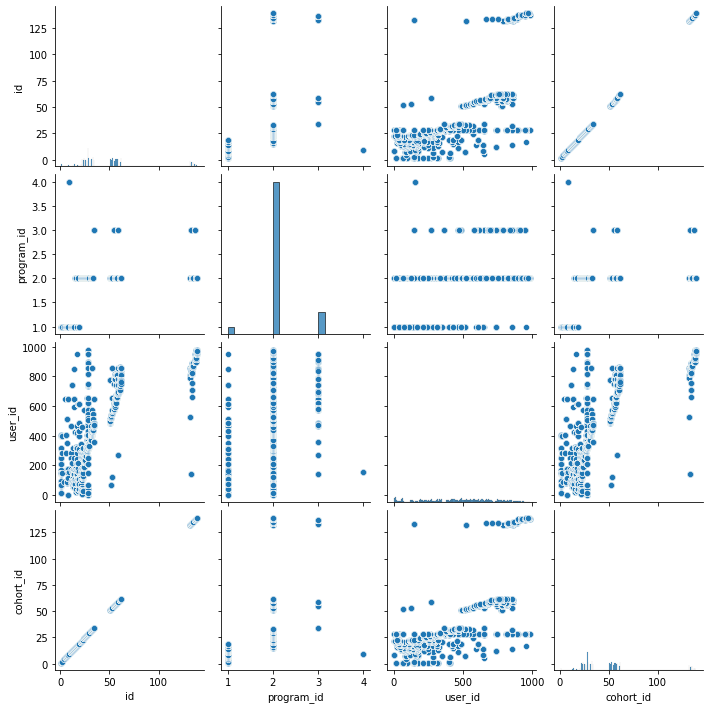

In [22]:
#Create a pair plot to see visual relationships between numeric variables
sns.pairplot(df)

In [64]:
#Combine date and time columns into one date-time column to use for indexing
#df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

<AxesSubplot:title={'center':'Which hours was the most active?'}>

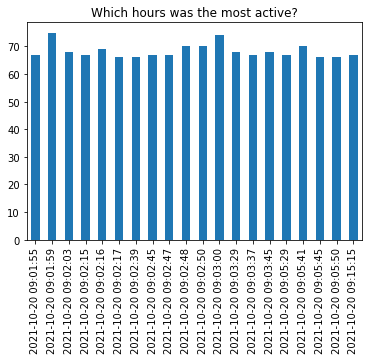

In [24]:
df.time.value_counts().head(20).sort_index().plot.bar(title='Which hours were the most active?')

<AxesSubplot:title={'center':'Which hours were the most active?'}>

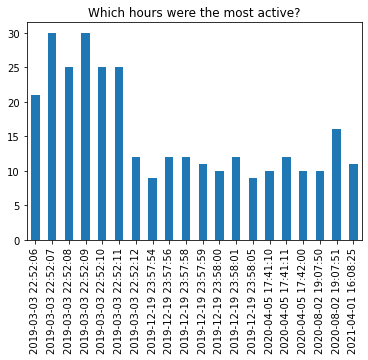

In [66]:
df.index.value_counts().head(20).sort_index().plot.bar(title='Which date/times were the most active?')

<AxesSubplot:title={'center':'Which program types are the most popular?'}>

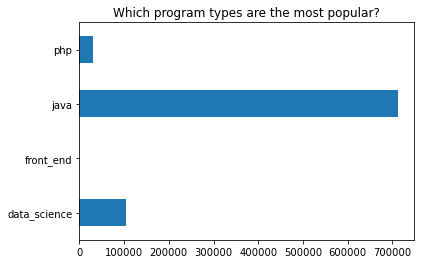

In [25]:
df.program_type.value_counts().sort_index().plot.barh(title="Which program types are the most popular?")

<AxesSubplot:title={'center':'Which cohorts are the most active online?'}>

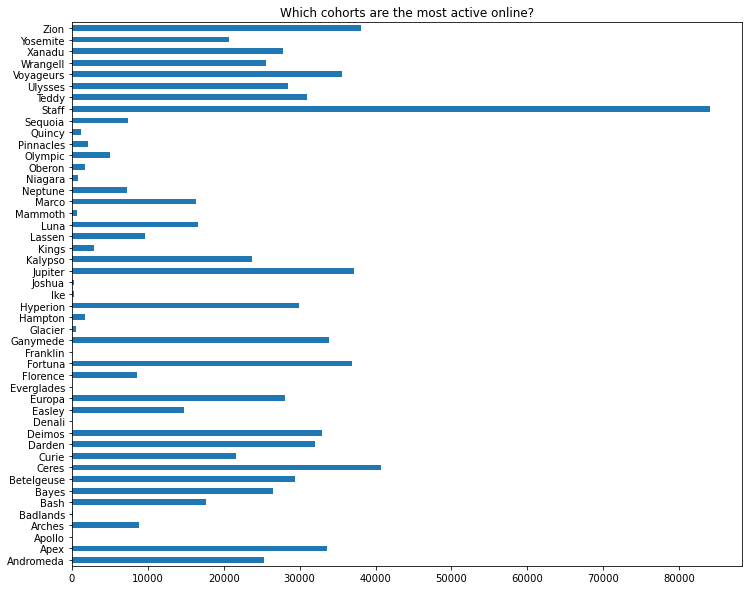

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
df.name.value_counts().sort_index().plot.barh(title="Which cohorts are the most active online?")

### Questions

<code style="background:skyblue;color:black">1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?</code>

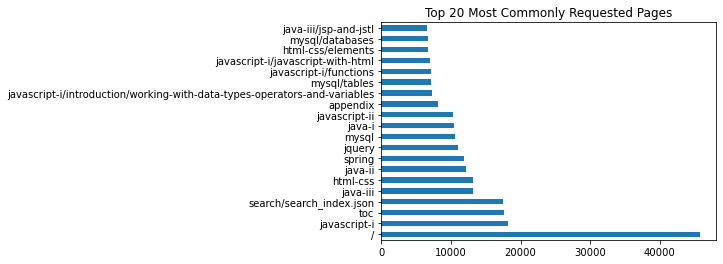

In [27]:
df.path.value_counts().head(20).plot.barh(
    title='Top 20 Most Commonly Requested Pages');

In [94]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [101]:
#Look at the top lessons accessed
path_df = value_counts_and_frequencies(df.path)
path_df.head(10)

,count,proba
/,45854,0.054116
javascript-i,18203,0.021483
toc,17591,0.020761
search/search_index.json,17534,0.020693
java-iii,13166,0.015538
html-css,13127,0.015492
java-ii,12177,0.014371
spring,11883,0.014024
jquery,11041,0.013030
mysql,10611,0.012523


In [113]:
#Look at the 20 lessons least accessed
path_df.tail(20)

,count,proba
appendix/intellij-intro,1,0.000001
130,1,0.000001
content/examples/git/gitbook/images/favicon.ico,1,0.000001
A-clustering/project,1,0.000001
2.1-spreadsheets-overview,1,0.000001
quizzes,1,0.000001
html-css/grid/css-grid-fundamentals,1,0.000001
java-iii/mvc/java-beans/',1,0.000001
examples/css//logincss,1,0.000001
content/loops.html,1,0.000001


- '/', which is the Code Up curriculum home page, is the most active, followed by javascript-i and then the table of contents.

<code style="background:skyblue;color:black">2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?</code>

In [92]:
#Let's take a look at user lesson counts
lesson_counts_by_cohort = df.groupby(['name'])['date','name','path'].nunique()
lesson_counts_by_cohort

,date,name,path
name,,,
Andromeda,447,1,366
Apex,386,1,273
Apollo,1,1,4
Arches,278,1,342
Badlands,12,1,44
Bash,252,1,275
Bayes,512,1,533
Betelgeuse,430,1,334
Ceres,466,1,301


In [93]:
#Let's take a look at user lesson counts by path
lesson_counts_by_path = df.groupby(['path'])['date','name'].nunique()
lesson_counts_by_path

,date,name
path,,
%20https://github.com/RaulCPena,1,1
',1,1
",%20https://github.com/RaulCPena",1,1
.git,1,1
.gitignore,2,2
...,...,...
web-dev-day-two,1,1
where,1,1
working-with-time-series-data,3,2


In [83]:
lesson_counts.path.min()

'/'

In [78]:
lesson_counts.sort_values(by='path').head(20)

,date,name,path
name,,,
Everglades,2020-05-06,Everglades,/
Apollo,2018-03-22,Apollo,content/html-css/introduction.html
Denali,2018-02-04,Denali,prework/versioning/github
Franklin,2019-05-12,Franklin,spring/setup
Curie,2021-04-20,Curie,timeseries/working-with-time-series-data-with-...
Ike,2020-12-10,Ike,toc
Mammoth,2019-08-01,Mammoth,toc
Joshua,2020-08-11,Joshua,toc
Neptune,2021-04-21,Neptune,toc


In [79]:
lesson_counts.sort_values(by='path').tail(20)

,date,name,path
name,,,
Xanadu,2021-02-20,Xanadu,web-design/ux/purpose
Andromeda,2021-04-05,Andromeda,web-design/ux/purpose
Kalypso,2021-04-21,Kalypso,web-design/ux/purpose
Apex,2021-04-20,Apex,web-design/ux/purpose
Betelgeuse,2021-04-21,Betelgeuse,web-design/ux/purpose
Ceres,2021-04-16,Ceres,web-design/ux/purpose
Lassen,2021-04-10,Lassen,web-design/ux/purpose
Europa,2021-04-19,Europa,web-design/ux/purpose
Deimos,2021-04-21,Deimos,web-design/ux/purpose


<code style="background:skyblue;color:black"> 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?</code>

- I will need to check students' start and end date and see how often they referenced the curriculum

In [105]:
#Create a new column 'is_active' to check against for entries while student was active in the program
df['is_active'] = np.where(((df['date'] > df['start_date']) & (df['date'] < df['end_date'])), 1, 0)

In [29]:
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,is_active
2019-06-01 17:31:13,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:13,/,402,1.0,71.78.236.131,php,0
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:28,java-i,402,1.0,71.78.236.131,php,0
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php,0
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:40,html-css,402,1.0,71.78.236.131,php,0
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:56:01,html-css/elements,402,1.0,71.78.236.131,php,0


- Use Conditional Probabilities to find user ids for active students accessing the curriculum the least

In [170]:
#Let's look at user ids that are active status
status_given_user_id = (
    df.groupby('is_active')
    .user_id.value_counts(normalize=True)
    .rename('proba_status_given_user_id')
    .reset_index()
)
status_given_user_id.head()

,is_active,user_id,proba_status_given_user_id
0,0,11,0.088266
1,0,64,0.080303
2,0,53,0.060751
3,0,314,0.038350
4,0,1,0.036483


In [171]:
#Look at the 10 user ids for active students to who least accessed the curriculum
status_given_user_id.tail(10)

,is_active,user_id,proba_status_given_user_id
1488,1,889,0.000025
1489,1,968,0.000025
1490,1,572,0.000019
1491,1,388,0.000012
1492,1,812,0.000011
1493,1,956,0.000008
1494,1,278,0.000006
1495,1,679,0.000005
1496,1,832,0.000005
1497,1,879,0.000002


In [172]:
#Look at the 10 user ids for non-active students to who least accessed the curriculum
status_given_user_id[status_given_user_id['is_active']== 0].tail(10)

,is_active,user_id,proba_status_given_user_id
764,0,929,0.000005
765,0,938,0.000005
766,0,939,0.000005
767,0,940,0.000005
768,0,944,0.000005
769,0,952,0.000005
770,0,956,0.000005
771,0,963,0.000005
772,0,968,0.000005
773,0,975,0.000005


In [173]:
#Let's find out more about the 3 least active user ids for active student not accessing the curriculum too frequently
df[(df.user_id == 879) | (df.user_id == 832)|(df.user_id == 679)]

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,is_active
2020-07-13 14:37:22,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 14:37:22,/,679,59.0,24.28.146.155,data_science,0
2020-07-13 14:39:21,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,data_science,0
2020-07-13 14:39:36,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,data_science,0
2020-07-13 14:39:37,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,data_science,0
2020-07-13 14:39:37,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 14:39:37,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,data_science,0
2020-07-13 15:49:31,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,data_science,0
2020-07-13 15:49:32,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 15:49:32,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,data_science,0
2020-07-13 15:49:32,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-13,2021-10-20 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,data_science,0
2020-07-14 08:05:15,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-14,2021-10-20 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,data_science,1
2020-07-14 08:05:15,59.0,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,3.0,2020-07-14,2021-10-20 08:05:15,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,data_science,1


<AxesSubplot:ylabel='user_id'>

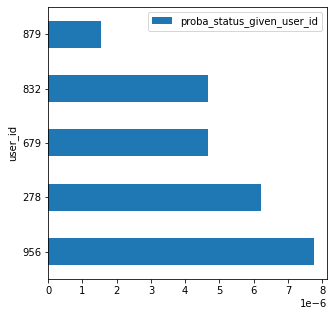

In [184]:
active_students_prob = status_given_user_id[status_given_user_id['is_active']== 1]
active_students_prob.tail(5).plot.barh(x = 'user_id', y='proba_status_given_user_id',figsize=(5, 5))


- User ID 879 only accessed the curriculum once while active in the program and was in the Marco cohort for Java between 1/25/2021 - 7/19/2021
- User ID 832 only accessed the curriculum 3 times while active in the program and was in the Jupiter cohort for Java between 9/21/2020 - 3/30/2021
- User ID 679 only accessed the curriculum 11 times while active in the program and was in the Darden cohort for Data Science between 7/13/2020 - 1/12/2021


<code style="background:skyblue;color:black">4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?</code>

In [193]:
df.columns

Index(['id', 'name', 'slack', 'start_date', 'end_date', 'created_at',
       'updated_at', 'program_id', 'date', 'time', 'path', 'user_id',
       'cohort_id', 'ip', 'program_type', 'is_active'],
      dtype='object')

In [195]:
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,path,user_id,cohort_id,ip,program_type,is_active
2019-06-01 17:31:13,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:13,/,402,1.0,71.78.236.131,php,0
2019-06-01 17:31:28,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:28,java-i,402,1.0,71.78.236.131,php,0
2019-06-01 17:31:35,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:35,java-i/syntax-types-and-variables,402,1.0,71.78.236.131,php,0
2019-06-01 17:31:40,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:31:40,html-css,402,1.0,71.78.236.131,php,0
2019-06-01 17:56:01,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2019-06-01,2021-10-20 17:56:01,html-css/elements,402,1.0,71.78.236.131,php,0


In [202]:
#Let's take a look at user ID counts
user_id_counts = df.groupby(['path']).nunique()
user_id_counts.tail()

,id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,time,user_id,cohort_id,ip,program_type,is_active
path,,,,,,,,,,,,,,,
web-dev-day-two,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
where,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
working-with-time-series-data,2,2,2,2,2,2,2,2,3,15,6,2,6,2,2
wp-admin,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
wp-login,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [32]:
#Let's take a look at ID counts
cohort_id_counts = df.groupby(['cohort_id'])['date','name','path'].nunique()
cohort_id_counts

,date,name,path
cohort_id,,,
1.0,278,1,342
2.0,12,1,44
4.0,1,1,4
5.0,1,1,1
6.0,12,1,45
7.0,46,1,143
8.0,162,1,278
9.0,1,1,4
11.0,18,1,95


In [33]:
# people that were in  one cohort?
cohort_id_counts[cohort_id_counts.name== 1]

,date,name,path
cohort_id,,,
1.0,278,1,342
2.0,12,1,44
4.0,1,1,4
5.0,1,1,1
6.0,12,1,45
7.0,46,1,143
8.0,162,1,278
9.0,1,1,4
11.0,18,1,95


In [34]:
#Let's take a look at IP counts
ip_counts = df.groupby(['ip'])['date','name','path'].nunique()
ip_counts

,date,name,path
ip,,,
100.11.170.135,7,1,20
100.19.73.35,36,1,57
100.35.67.162,1,1,8
103.137.12.164,1,1,8
104.1.46.153,3,1,7
...,...,...,...
99.97.210.12,2,1,12
99.98.245.245,1,1,2
99.98.32.165,32,1,101


In [35]:
#ip counts less than 5
ip_counts[ip_counts.name == 1]

,date,name,path
ip,,,
100.11.170.135,7,1,20
100.19.73.35,36,1,57
100.35.67.162,1,1,8
103.137.12.164,1,1,8
104.1.46.153,3,1,7
...,...,...,...
99.97.210.12,2,1,12
99.98.245.245,1,1,2
99.98.32.165,32,1,101


In [41]:
cohort_counts = df.groupby(['name'])['path','cohort_id','date'].nunique()

cohort_counts

,path,cohort_id,date
name,,,
Andromeda,366,1,447
Apex,273,1,386
Apollo,4,1,1
Arches,342,1,278
Badlands,44,1,12
Bash,275,1,252
Bayes,533,1,512
Betelgeuse,334,1,430
Ceres,301,1,466


In [42]:
user_id_counts = df.groupby(['user_id'])['path','cohort_id','date'].nunique()

user_id_counts

,path,cohort_id,date
user_id,,,
1,976,2,637
2,151,1,83
3,169,1,107
4,143,1,54
5,197,1,82
...,...,...,...
977,12,1,10
978,18,1,9
979,20,1,9


In [43]:
first_access = df.groupby(['user_id'])['date'].min()
first_access

user_id
1     2018-01-26
2     2018-01-26
3     2018-01-26
4     2018-01-26
5     2018-01-26
         ...    
977   2021-04-12
978   2021-04-12
979   2021-04-12
980   2021-04-13
981   2021-04-19
Name: date, Length: 911, dtype: datetime64[ns]

In [44]:
user_id_by_first_access_date = pd.DataFrame({'first_access_date': first_access}\
                                      ).reset_index().groupby('first_access_date').count()
user_id_by_first_access_date

,user_id
first_access_date,
2018-01-26,49
2018-01-27,2
2018-01-28,1
2018-01-29,7
2018-01-30,6
...,...
2021-04-08,1
2021-04-11,1
2021-04-12,26


In [45]:
user_id_by_first_access_date.index = pd.to_datetime(user_id_by_first_access_date.index)

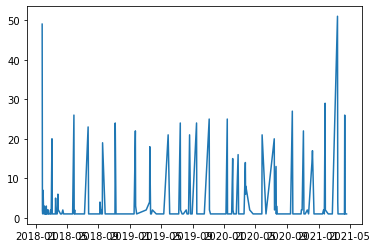

In [46]:
plt.plot(user_id_by_first_access_date)
plt.show()

<code style="background:skyblue;color:black"> 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?</code>

In [47]:
page_views = df.groupby(['user_id'])['path'].agg(['count', 'nunique'])
page_views

,count,nunique
user_id,,
1,7404,976
2,1541,151
3,1562,169
4,692,143
5,1701,197
...,...,...
977,86,12
978,55,18
979,127,20


In [48]:
# Scaler import
from sklearn.preprocessing import MinMaxScaler

# create the scaler
scaler = MinMaxScaler().fit(page_views)
# use the scaler
page_views_scaled_array = scaler.transform(page_views)
page_views_scaled_array[0:10]

array([[0.41329835, 1.        ],
       [0.08597588, 0.15384615],
       [0.08714828, 0.17230769],
       [0.03857749, 0.14564103],
       [0.09490844, 0.20102564],
       [0.07855069, 0.22974359],
       [0.10060295, 0.17435897],
       [0.02690933, 0.09128205],
       [0.03260384, 0.14871795],
       [0.05141804, 0.14666667]])

Construct a DBSCAN object that requires a minimum of 20 data points in a neighborhood of radius 0.1 to be considered a core point.


In [49]:
# DBSCAN import
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 0.1, min_samples=20).fit(page_views_scaled_array)

In [50]:
# Now, let's add the scaled value columns back onto the dataframe
columns = list(page_views.columns)
scaled_columns = ["scaled_" + column for column in columns]
scaled_columns

['scaled_count', 'scaled_nunique']

In [51]:
# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(page_views_scaled_array, columns=scaled_columns, index=page_views.index)
scaled_df

,scaled_count,scaled_nunique
user_id,,
1,0.413298,1.000000
2,0.085976,0.153846
3,0.087148,0.172308
4,0.038577,0.145641
5,0.094908,0.201026
...,...,...
977,0.004745,0.011282
978,0.003015,0.017436
979,0.007034,0.019487


In [52]:
# Merge the scaled and non-scaled values into one dataframe
page_views = page_views.merge(scaled_df, on=page_views.index).drop(columns=['key_0'])

In [53]:
page_views.head()


,count,nunique,scaled_count,scaled_nunique
0,7404,976,0.413298,1.000000
1,1541,151,0.085976,0.153846
2,1562,169,0.087148,0.172308
3,692,143,0.038577,0.145641
4,1701,197,0.094908,0.201026


In [189]:
labels = dbsc.labels_


In [190]:
page_views['labels'] = labels
page_views.labels.value_counts()

 0    902
-1      9
Name: labels, dtype: int64

In [56]:
page_views[page_views.labels==-1]

,count,nunique,scaled_count,scaled_nunique,labels
0,7404,976,0.413298,1.000000,-1
10,17913,871,1.000000,0.892308,-1
51,12329,333,0.688254,0.340513,-1
56,16322,436,0.911177,0.446154,-1
226,5075,625,0.283274,0.640000,-1
292,7783,225,0.434457,0.229744,-1
382,5897,266,0.329165,0.271795,-1
448,6451,243,0.360094,0.248205,-1
533,6434,354,0.359145,0.362051,-1


In [57]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(page_views.describe())
print("-------------")
print("Inliers")
print(page_views[page_views.labels==0].describe())
print("-------------")
print("Outliers")
print(page_views[page_views.labels==-1].describe())

Population
              count     nunique  scaled_count  scaled_nunique      labels
count    911.000000  911.000000    911.000000      911.000000  911.000000
mean     930.108672  118.299671      0.051871        0.120307   -0.009879
std     1236.014277   80.402266      0.069005        0.082464    0.098957
min        1.000000    1.000000      0.000000        0.000000   -1.000000
25%      193.000000   53.500000      0.010719        0.053846    0.000000
50%      697.000000  140.000000      0.038857        0.142564    0.000000
75%     1298.500000  165.000000      0.072437        0.168205    0.000000
max    17913.000000  976.000000      1.000000        1.000000    0.000000
-------------
Inliers
             count     nunique  scaled_count  scaled_nunique  labels
count   902.000000  902.000000    902.000000      902.000000   902.0
mean    844.480044  114.680710      0.047090        0.116596     0.0
std     771.913713   67.132615      0.043095        0.068854     0.0
min       1.000000    1.0

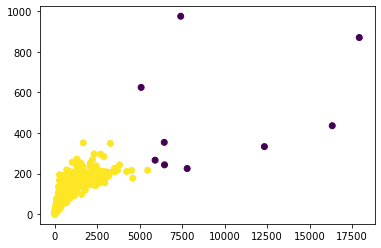

In [58]:
plt.scatter(page_views['count'], page_views['nunique'], c=page_views.labels)
plt.show()

<code style="background:skyblue;color:black">6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?</code>


- I will need to check topics referenced after end date 

<code style="background:skyblue;color:black">7. Which lessons are least accessed?</code>


<AxesSubplot:title={'center':'30 Least Commonly Requested Pages'}>

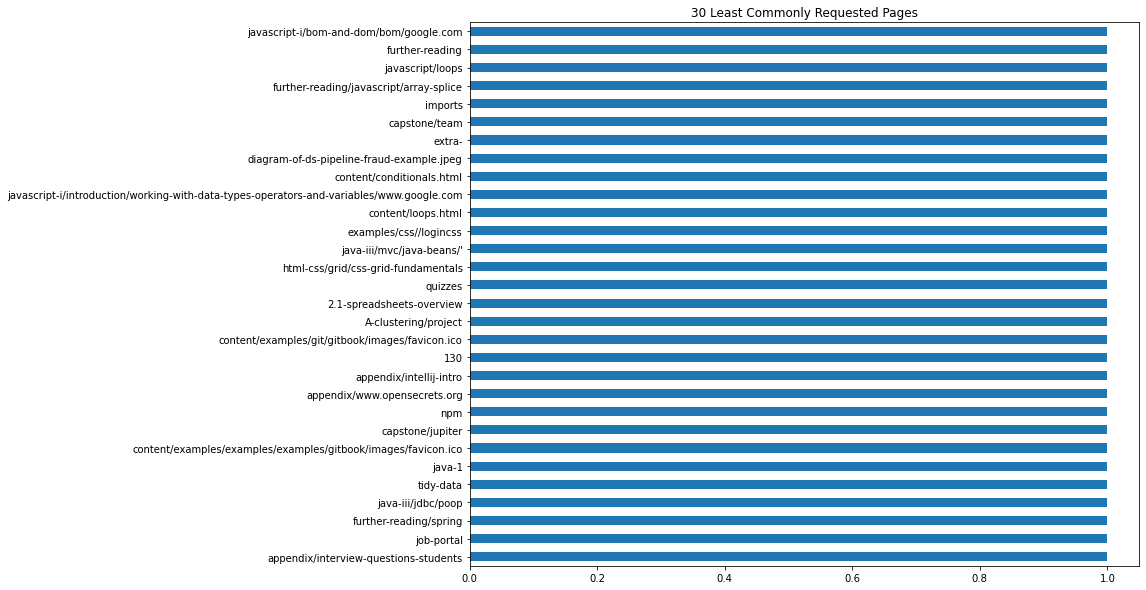

In [59]:
fig, ax = plt.subplots(figsize=(12,10))
df.path.value_counts().tail(30).plot.barh(
    title='30 Least Commonly Requested Pages',
)

<code style="background:skyblue;color:black"> 8. Anything else I should be aware of?</code>

In [60]:
# get the counts of ips in the dataset

ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'ip', 'ip': 'ip_count'})

In [61]:
ip_df.head(20)

,ip,ip_count
0,97.105.19.58,268648
1,97.105.19.61,60530
2,192.171.117.210,9124
3,71.150.217.33,6791
4,76.185.145.231,4754
5,12.106.208.194,4343
6,67.11.50.23,4181
7,70.112.179.142,4117
8,70.121.183.95,3843
9,172.124.67.93,3511


In [62]:
ip_df.tail(20)

,ip,ip_count
5180,174.197.1.23,1
5181,208.54.83.222,1
5182,172.58.111.216,1
5183,172.56.14.207,1
5184,173.239.232.32,1
5185,172.56.7.212,1
5186,172.56.6.37,1
5187,95.181.238.34,1
5188,173.123.121.68,1
5189,172.56.21.254,1


In [63]:
ip_df[ip_df['ip_count'] == 1].nunique()

ip          763
ip_count      1
dtype: int64